In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn. preprocessing import scale, minmax_scale, robust_scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
matplotlib.rc('font',family = 'Noto Sans CJK JP')
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
os.getcwd()

'C:\\Users\\소은\\Desktop\\preproject_1105'

In [10]:
path = 'C:/Program Files/Graphviz/bin/'

In [11]:
# df_raw = pd.read_csv(path + "/HMEQ.csv", engine = "python",encoding = 'cp949')
df_raw = pd.read_csv('C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/HMEQ.csv', engine = 'python', encoding = 'cp949')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [12]:
df_raw.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [13]:
df_raw = df_raw.fillna(df_raw.mean())

In [14]:
df_raw = df_raw.dropna()

In [15]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [16]:
df_raw_dummy = df_raw_dummy.astype(float)

In [17]:
df_raw_x = df_raw_dummy.drop('BAD', axis = 1)
df_raw_y = df_raw_dummy['BAD']
df_raw_x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1700.0,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1800.0,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2300.0,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2400.0,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2400.0,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
df_train_x, df_test_x , df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3,
                                    random_state = 1234)

print('train data X size :{}'.format(df_train_x.shape))
print('train data Y size :{}'.format(df_train_y.shape))
print('test data X size :{}'.format(df_test_x.shape))
print('test data X size :{}'.format(df_test_y.shape))

train data X size :(2566, 18)
train data Y size :(2566,)
test data X size :(1101, 18)
test data X size :(1101,)


In [19]:
model = ['DecisionTree', 'RandomForest','GradientBoosting','NeuralNet']

train_accuracy = []; test_accuracy = []
model_auc = []

model_precision = []; model_recall = []
model_f1_score = []

# 의사결정나무

In [20]:
dt_model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 30)
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc =auc(fpr,tpr)

model_auc.append(roc_auc)

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


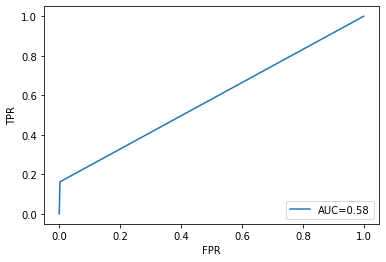

In [21]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [22]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

# 랜덤 포레스트

In [23]:
rf_model= RandomForestClassifier(min_samples_leaf=20,
                                max_depth=4,
                                n_estimators=100,
                                random_state=1234)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x,df_train_y))
test_accuracy.append(rf_model.score(df_test_x,df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)

model_auc.append(roc_auc)


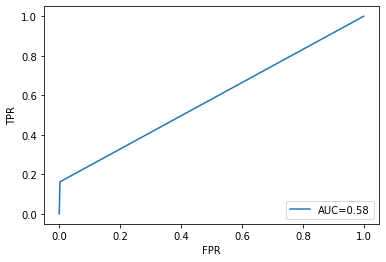

In [24]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


In [25]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))

model_f1_score.append(f1_score(df_test_y,y_pred))

# 그레디언트 부스팅

In [26]:
#그래디언트 부스팅
gb_final = GradientBoostingClassifier(min_samples_leaf=10,
                                     max_depth=4,
                                     n_estimators=100,
                                     learning_rate =.1,
                                     random_state =1234)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x,df_train_y))
test_accuracy.append(gb_final.score(df_test_x,df_test_y))

y_pred = gb_final.predict(df_test_x)

fpr,tpr,thresholds= roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

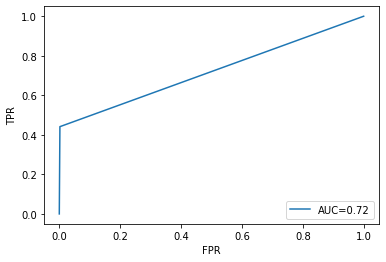

In [27]:
plt.plot(fpr,tpr,label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [28]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

## 설명변수 scaling

In [29]:
#변수명 저장
v_feature_names=df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_names)

In [30]:
#데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("train data Y size:{}".format(df_scaled_test_x.shape))

train data X size:(2566, 18)
train data Y size:(1101, 18)


### 인공신경망

In [31]:
#모델생성
nn_model = MLPClassifier(hidden_layer_sizes = (80,80), activation = "relu", solver = "adam", random_state = 1234)
nn_model.fit(df_scaled_train_x, df_train_y)
#train 정확도
train_accuracy.append(nn_model.score(df_scaled_train_x, df_train_y))
#test 정확도
test_accuracy.append(nn_model.score(df_scaled_test_x,df_test_y))
#예측값
y_pred = nn_model.predict(df_scaled_test_x)
#roc_curve(실제값, 예측값)
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)
#auc저장
model_auc.append(roc_auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


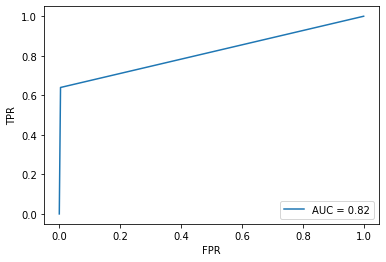

In [32]:
#roc_curve그리기, label에 auc표시(소수점 두자리)
plt.plot(fpr,tpr,label = "AUC = %0.2f"%roc_auc)
plt.legend(loc = "lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [33]:
#precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
#f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [34]:
#모델별 평과 결과
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"]=train_accuracy
df_eval["TestAccuracy"]=test_accuracy
df_eval["AUC"] = model_auc
df_eval["Precision"] = model_precision
df_eval["Recall"] = model_recall
df_eval["F1Score"]=model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.929,0.914,0.580,0.900,0.162,0.275
RandomForest,0.929,0.914,0.580,0.900,0.162,0.275
GradientBoosting,0.971,0.942,0.720,0.961,0.441,0.605
NeuralNet,1.000,0.960,0.818,0.947,0.640,0.763


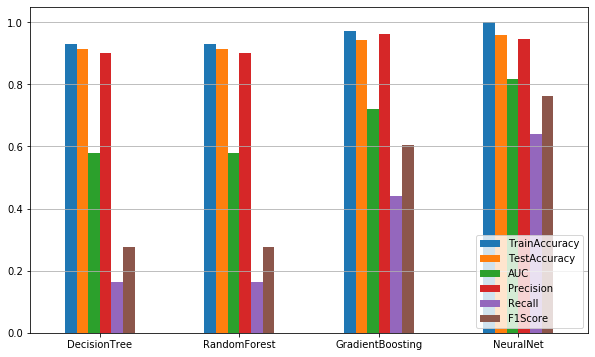

In [35]:
#모델별 평가지표확인
df_eval.plot.bar(rot = 0, figsize = (10,6))
plt.legend(loc = "lower right")
plt.grid(axis = "y")